# Lending Club<br />2018 Loan Datasets<br />Descriptive Statistics

The purpose of this project is to study the descriptive statistics of the 2018 loan data collected on LendingClub website to provide the company’s prospective investors a thorough insight into the market. This project aims at providing the answer to the following questions:
- **What are the characteristics of fully paid vs. default loans?**

The project first conducts a time series analysis of the issued loans in 2018, then takes a look at frequency distribution of each loan status flag and finally studies the location of the features in the dataset. The loan status flag categorizes loan status into two categories:
- **Fully paid** loans include loans that had been paid off.
- **Default** loans include loans that had been defaulted or charged off.


The data used for this project is a pickle file produced by the data wrangling program. The python notebook for data wrangling program can be found [here](https://github.com/nphan20181/Loan-Default-Prediction/blob/master/loan_data_wrangling.ipynb).

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import modules.global_vars as gv             # load user-defined variables
import modules.global_plot_functions as gp   # load user-defined plot functions

pd.set_option('display.max_columns', 150)
sns.set()

In [2]:
df = pd.read_pickle('out/2018_LC_Loans_Cleaned.pkl')  # load cleaned loan data
df.head()

,loan_amnt,term,int_rate,installment,grade,emp_length,home_ownership,annual_inc,issue_d,title,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp,total_pymnt,last_pymnt_d,collections_12_mths_ex_med,application_type,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_act_il,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_inq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,loan_status_flag,roi,months_in_loan
0,3000.0,36 months,0.0734,93.10,A,9 years,RENT,52000.0,2018-03-01,Major purchase,0.58,0.0,1998-01-01,0.0,7.0,0.0,141.0,0.005,30.0,0.0,3011.577285,2018-05-01,0.0,Individual,0.0,0.0,150592.0,0.0,0.0,1.0,2.0,7.0,0.0,74.0,0.0,1.0,141.0,1.0,31000.0,1.0,2.0,2.0,3.0,25099.0,30359.0,0.5,0.0,0.0,132.0,242.0,18.0,7.0,4.0,18.0,7.0,0.0,1.0,1.0,4.0,15.0,7.0,6.0,19.0,1.0,7.0,0.0,0.0,0.0,1.0,96.7,0.0,0.0,0.0,191216.0,141.0,30500.0,0.0,Fully Paid,11.577285,2.0
1,5000.0,36 months,0.1198,166.03,B,10+ years,OWN,55000.0,2018-03-01,Other,14.18,0.0,2001-08-01,0.0,14.0,1.0,11449.0,0.339,24.0,0.0,5013.306667,2018-04-01,0.0,Individual,0.0,0.0,28880.0,1.0,1.0,0.0,0.0,33.0,17431.0,63.0,2.0,2.0,4829.0,47.0,33800.0,0.0,1.0,1.0,2.0,2222.0,10551.0,52.0,0.0,0.0,77.0,199.0,3.0,3.0,0.0,3.0,12.0,1.0,3.0,3.0,4.0,7.0,6.0,13.0,18.0,3.0,14.0,0.0,0.0,0.0,2.0,95.7,33.3,1.0,0.0,61551.0,28880.0,22000.0,27751.0,Fully Paid,13.306667,1.0
2,7000.0,36 months,0.1198,232.44,B,< 1 year,MORTGAGE,40000.0,2018-03-01,Home improvement,20.25,0.0,2007-03-01,0.0,13.0,0.0,5004.0,0.360,29.0,0.0,7693.314943,2019-03-01,0.0,Individual,0.0,0.0,131726.0,1.0,6.0,0.0,2.0,16.0,126722.0,102.0,2.0,2.0,3944.0,90.0,13900.0,2.0,1.0,4.0,4.0,10977.0,4996.0,50.0,0.0,0.0,122.0,132.0,1.0,1.0,0.0,10.0,5.0,3.0,2.0,2.0,3.0,4.0,19.0,7.0,10.0,2.0,13.0,0.0,0.0,0.0,2.0,89.7,33.3,0.0,0.0,132817.0,131726.0,10000.0,118917.0,Fully Paid,693.314943,12.0
3,10000.0,36 months,0.1090,326.92,B,< 1 year,RENT,52320.0,2018-03-01,Debt consolidation,12.87,0.0,2007-10-01,1.0,6.0,1.0,1692.0,0.385,26.0,0.0,11036.679274,2019-04-01,0.0,Individual,0.0,0.0,74220.0,0.0,3.0,2.0,3.0,7.0,72528.0,113.0,1.0,1.0,1692.0,94.0,4400.0,2.0,1.0,4.0,4.0,12370.0,608.0,73.6,0.0,0.0,125.0,48.0,7.0,7.0,0.0,45.0,0.0,0.0,1.0,1.0,1.0,1.0,23.0,3.0,3.0,1.0,6.0,0.0,0.0,0.0,3.0,100.0,0.0,1.0,0.0,72124.0,74220.0,2300.0,67724.0,Fully Paid,1036.679274,13.0
4,28000.0,36 months,0.1090,915.36,B,6 years,MORTGAGE,103000.0,2018-03-01,Debt consolidation,30.76,0.0,2002-03-01,0.0,12.0,0.0,21266.0,0.265,30.0,0.0,30922.184697,2019-05-01,0.0,Individual,0.0,0.0,76475.0,3.0,3.0,2.0,3.0,4.0,55209.0,91.0,1.0,3.0,10750.0,41.0,80300.0,0.0,0.0,0.0,6.0,6373.0,59034.0,26.5,0.0,0.0,134.0,184.0,2.0,2.0,1.0,2.0,5.0,1.0,4.0,4.0,9.0,15.0,12.0,9.0,17.0,4.0,12.0,0.0,0.0,0.0,3.0,96.7,11.1,0.0,0.0,153679.0,76475.0,80300.0,73379.0,Fully Paid,2922.184697,14.0


In [3]:
df.shape

(93853, 80)

## Issued Loans

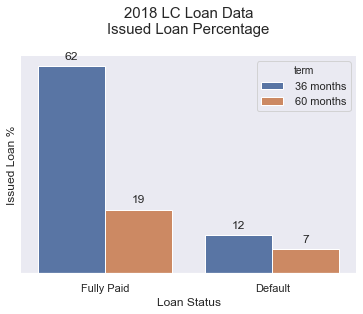

In [4]:
#ax = sns.countplot(x='loan_status_flag', data=df)
ax = sns.barplot(x="loan_status_flag", y="loan_status_flag", hue='term', data=df, 
                 estimator=lambda x: len(x) / len(df) * 100, orient='v')
gp.annotate_plot(ax)
gp.hide_borders(ax, ['top', 'right', 'left'])   # hide top and right borders
ax.get_yaxis().set_ticks([])
ax.get_yaxis().set_ticklabels([])
plt.ylabel('Issued Loan %')
_ = plt.xlabel('Loan Status')
_ = plt.title('2018 LC Loan Data\nIssued Loan Percentage\n', size=15)

## Last Payment Date

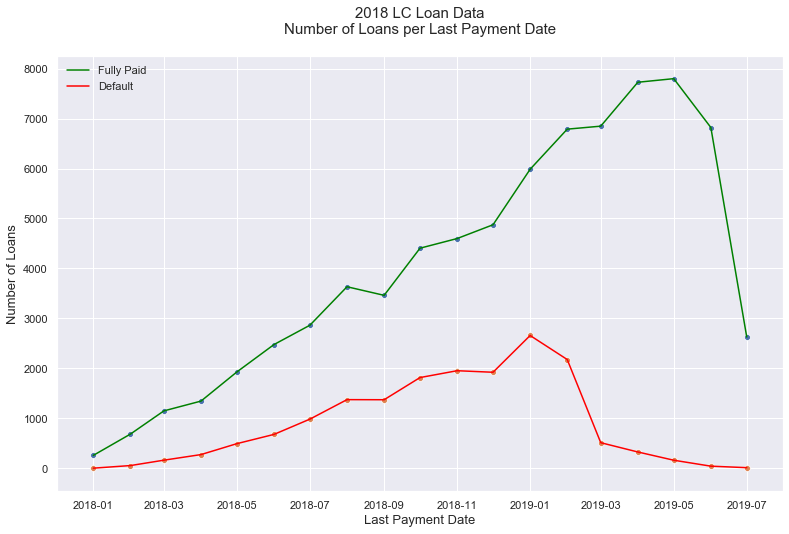

In [5]:
fig, ax = plt.subplots(figsize=(13, 8))
last_pymnt = df.groupby(['last_pymnt_d','loan_status_flag'])[['last_pymnt_d']].count().unstack()['last_pymnt_d']

for col_name in gv.LOAN_STATUS_FLAG:
    temp = pd.DataFrame(last_pymnt[col_name])
    sns.lineplot(temp.index, temp[col_name], label=col_name, color=gv.STATUS_FLAG_COLORS[col_name])
    sns.scatterplot(temp.index, temp[col_name])

ax.legend(loc='upper left', frameon=False)
ax.set_ylabel('Number of Loans', fontsize=13)
ax.set_xlabel('Last Payment Date', fontsize=13)
ax.set_title('2018 LC Loan Data\nNumber of Loans per Last Payment Date\n', fontsize=15)
plt.show()

## Frequency Distribution

In [6]:
def compute_pct(df_in, col_name):
    df_temp = df_in.groupby([col_name, 'loan_status_flag'])[[col_name]].count().unstack()[col_name]
    
    for status in gv.LOAN_STATUS_FLAG:
        status_pct = status + ' %'
        df_temp.columns = df_temp.columns.add_categories([status_pct])
        df_temp[status_pct] = round(df_temp[status] * 100 / df_temp[status].sum(), 0)
    
    return df_temp[gv.LOAN_STATUS_PCT]

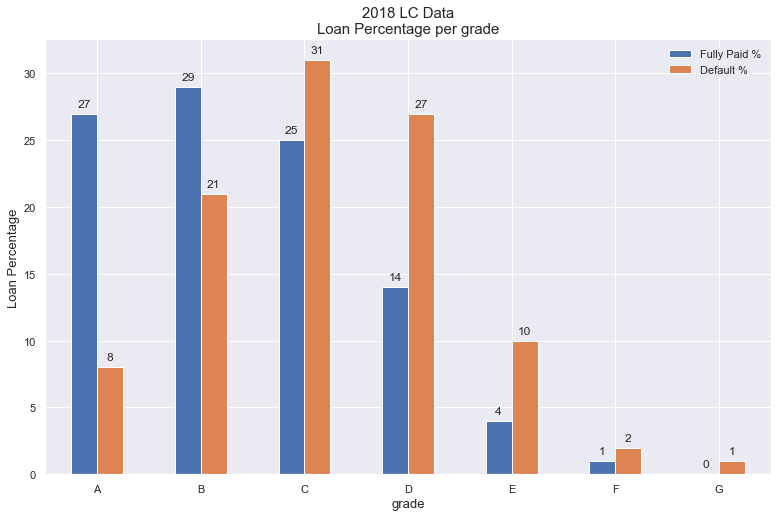

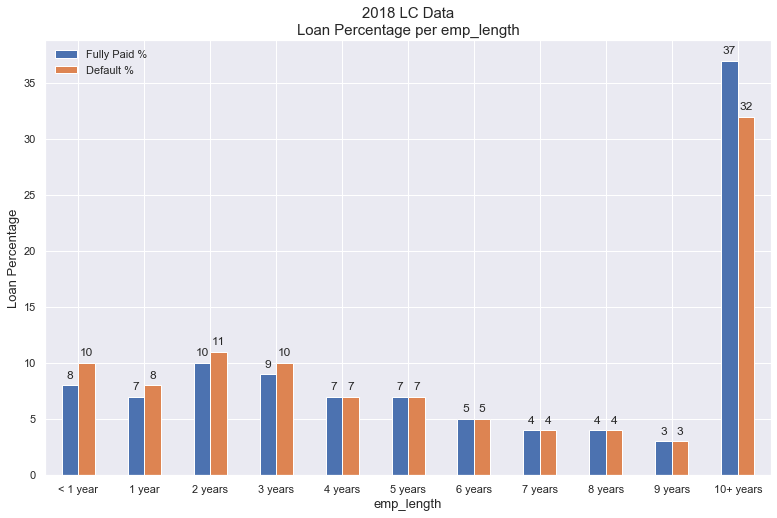

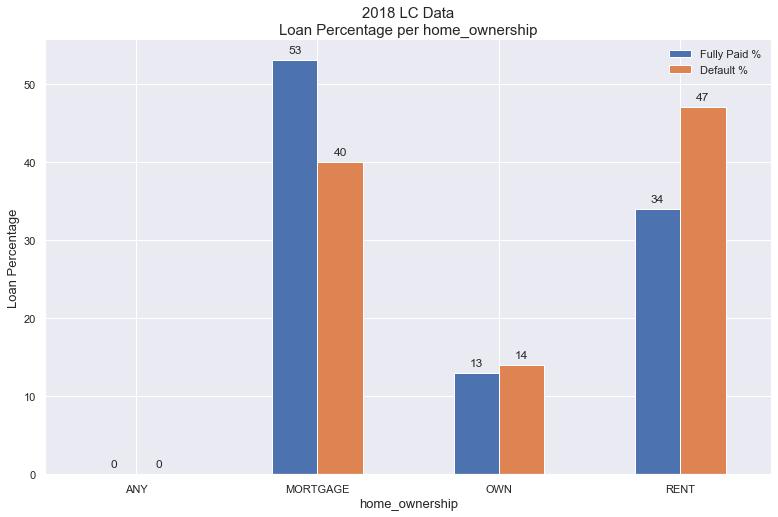

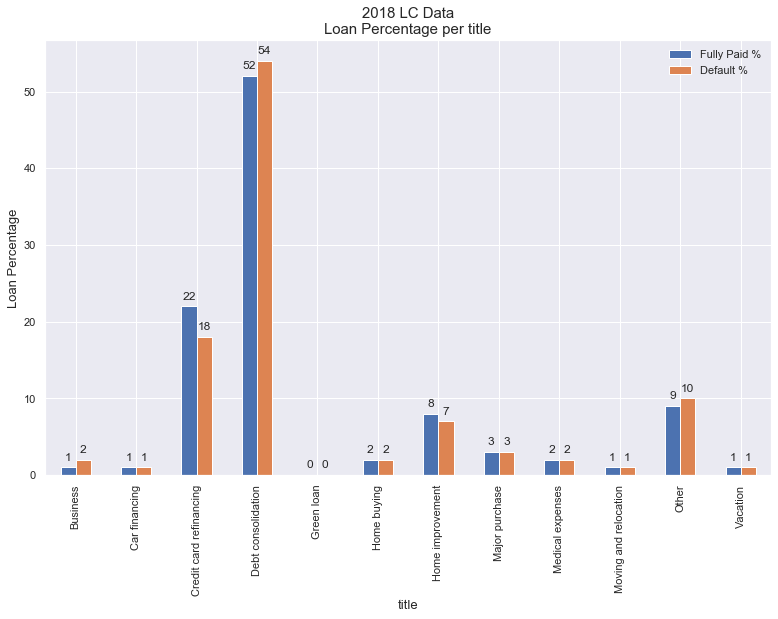

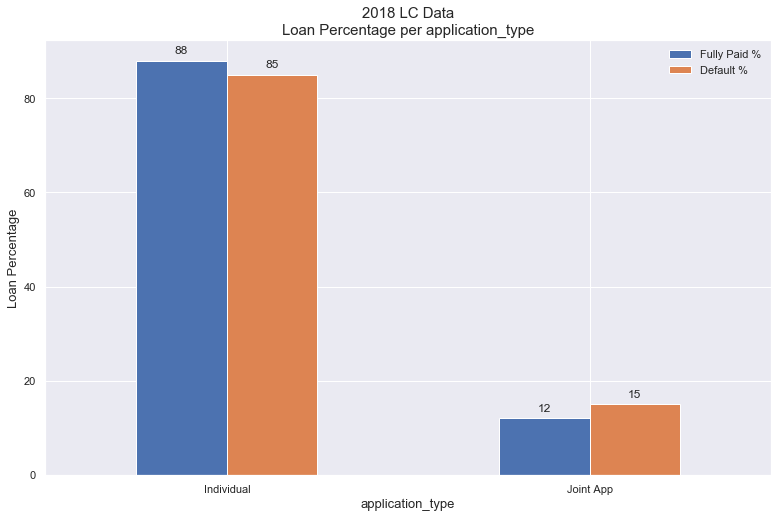

In [7]:
# a list of categorical columns for plotting
cat_cols = list(df.select_dtypes(include=['category']).columns)
cat_cols.remove('term')
cat_cols.remove('loan_status_flag')

for col_name in cat_cols:
    fig, ax = plt.subplots(figsize=(13, 8))
    temp = compute_pct(df, col_name)
    temp.plot.bar(ax=ax)
    gp.annotate_plot(ax)
    legend = ax.legend(loc='best', frameon=False)
    plt.title('2018 LC Data\nLoan Percentage per ' + col_name, fontsize=15)
    ax.set_ylabel('Loan Percentage', fontsize=13)
    ax.set_xlabel(col_name, fontsize=13)
    
    if col_name == 'title':
        plt.xticks(rotation=90)
    else:
        plt.xticks(rotation=0)

## Location of Data

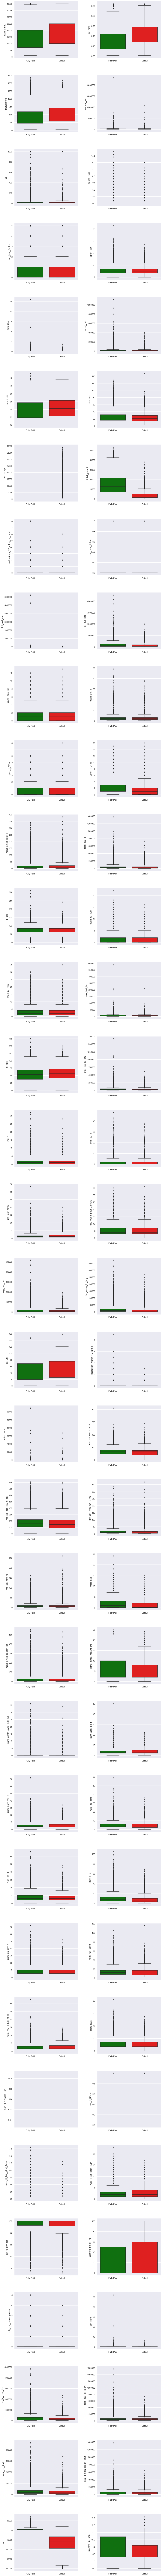

In [8]:
# box plots - location of data
y_cols = list(df.select_dtypes(include=['float64']).columns)

cols = 2
rows = int(round(len(y_cols)/cols, 0))
fig, ax = plt.subplots(figsize=(14, rows*7), nrows=rows, ncols=cols)
y_index = -1
for r in range(rows):
    for c in range(cols):
        y_index += 1
        g = sns.boxplot(x="loan_status_flag", y=y_cols[y_index], data=df, ax=ax[r, c], palette=gv.STATUS_FLAG_COLORS)
        gp.hide_borders(ax[r, c], ['top', 'right'])   # hide top and right borders
        ax[r, c].set_xlabel('')
        ax[r, c].set_ylabel(y_cols[y_index], fontsize=13)

#plt.suptitle('LendingClub\n2018 Loan Data', fontsize=14)
plt.subplots_adjust(left=None, bottom=None, right=0.9, top=0.9, wspace=0.3, hspace=0.3)
plt.show()